<a href="https://colab.research.google.com/github/Hussein-Ahmad-94/Encoding_the_loss/blob/main/Code_Training_Three%2B%2BModels_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a model1, model2, model3
```
# This is formatted as code for training the 3 models . Use the power for the combined loss in decreasing the validation loss
```



## Code I

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras import backend as K
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create input and output pairs
def createXY(dataset, n_past):
    dataX, dataY = [], []
    for i in range(n_past, len(dataset)):
        dataX.append(dataset[i - n_past:i, :2])  # Extracting the first two features
        dataY.append(dataset[i, 2])  # Extracting the third feature as the target
    return np.array(dataX), np.array(dataY)

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples in the dataset
num_samples = 10

In [ ]:
# Generate a simple dataset with two features and one target
feature1 = np.sin(np.linspace(0, 2*np.pi, num_samples)) + 0.2 * np.random.randn(num_samples)
feature2 = np.cos(np.linspace(0, 2*np.pi, num_samples)) + 0.2 * np.random.randn(num_samples)
target = 2 * feature1 + 0.5 * feature2 + 0.1 * np.random.randn(num_samples)

# Combine features and target into a single dataset
data = np.column_stack((feature1, feature2, target))

In [ ]:
# Display the generated dataset
print("Generated Dataset:")
print(data)

Generated Dataset:
[[ 0.09934283  0.90731646  0.79890877]
 [ 0.61513475  0.67289849  1.54414112]
 [ 1.11434546  0.22204063  2.34646406]
 [ 1.17063138 -0.88265605  1.75745991]
 [ 0.29518947 -1.28467619 -0.10639743]
 [-0.38884753 -1.05215013 -1.29267787]
 [-0.55018284 -0.70256622 -1.56674815]
 [-0.83132081  0.23649764 -1.50682299]
 [-0.73668249  0.58443963 -1.24120903]
 [ 0.10851201  0.71753926  0.54662427]]


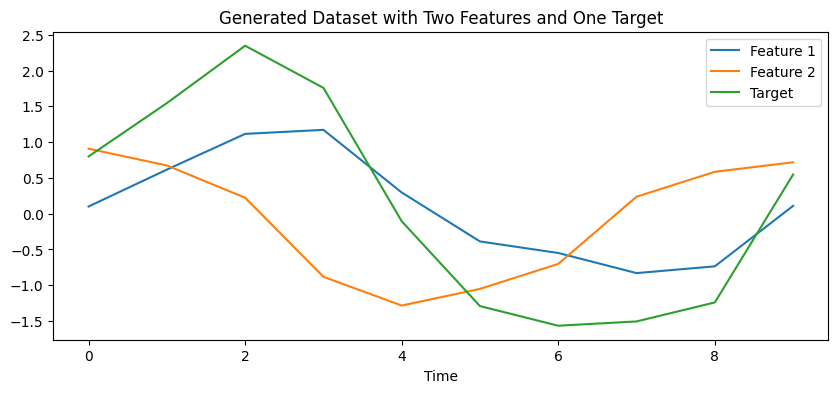

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(feature1, label='Feature 1')
plt.plot(feature2, label='Feature 2')
plt.plot(target, label='Target')
plt.title('Generated Dataset with Two Features and One Target')
plt.xlabel('Time')
plt.legend()
plt.show()

In [ ]:
# Set the number of past time steps to consider
n_past = 3

# Create input and output pairs using the createXY function
dataX, dataY = createXY(data, n_past)


In [ ]:
# Display the input and output pairs
print("\nInput (dataX):")
print(dataX)



Input (dataX):
[[[ 0.09934283  0.90731646]
  [ 0.61513475  0.67289849]
  [ 1.11434546  0.22204063]]

 [[ 0.61513475  0.67289849]
  [ 1.11434546  0.22204063]
  [ 1.17063138 -0.88265605]]

 [[ 1.11434546  0.22204063]
  [ 1.17063138 -0.88265605]
  [ 0.29518947 -1.28467619]]

 [[ 1.17063138 -0.88265605]
  [ 0.29518947 -1.28467619]
  [-0.38884753 -1.05215013]]

 [[ 0.29518947 -1.28467619]
  [-0.38884753 -1.05215013]
  [-0.55018284 -0.70256622]]

 [[-0.38884753 -1.05215013]
  [-0.55018284 -0.70256622]
  [-0.83132081  0.23649764]]

 [[-0.55018284 -0.70256622]
  [-0.83132081  0.23649764]
  [-0.73668249  0.58443963]]]


In [ ]:
print("\nOutput (dataY):")
print(dataY)



Output (dataY):
[ 1.75745991 -0.10639743 -1.29267787 -1.56674815 -1.50682299 -1.24120903
  0.54662427]


In [ ]:
# Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
X_train.shape

(5, 3, 2)

In [ ]:
X_train

array([[[ 0.09934283,  0.90731646],
        [ 0.61513475,  0.67289849],
        [ 1.11434546,  0.22204063]],

       [[ 0.61513475,  0.67289849],
        [ 1.11434546,  0.22204063],
        [ 1.17063138, -0.88265605]],

       [[ 1.11434546,  0.22204063],
        [ 1.17063138, -0.88265605],
        [ 0.29518947, -1.28467619]],

       [[ 1.17063138, -0.88265605],
        [ 0.29518947, -1.28467619],
        [-0.38884753, -1.05215013]],

       [[ 0.29518947, -1.28467619],
        [-0.38884753, -1.05215013],
        [-0.55018284, -0.70256622]]])

In [ ]:
Y_train

array([ 1.75745991, -0.10639743, -1.29267787, -1.56674815, -1.50682299])

In [ ]:
X_test.shape

(2, 3, 2)

In [ ]:
dataX.shape

(7, 3, 2)

In [ ]:
# Use MinMaxScaler to scale the features and target
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_train= scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

Y_train = scaler_Y.fit_transform(Y_train.reshape(-1, 1)).reshape(Y_train.shape)
Y_test = scaler_Y.transform(Y_test.reshape(-1, 1)).reshape(Y_test.shape)

In [ ]:
# Define custom loss function
def custom_loss(y_true, y_pred):
    loss = K.mean(K.square(y_pred - y_true))
    return loss

In [ ]:
# Build and compile models
model1 = Sequential()
model1.add(LSTM(64, input_shape=(n_past, 2)))
model1.add(Dense(1))
model1.compile(optimizer=Adam(), loss=custom_loss)

model2 = Sequential()
model2.add(LSTM(64, input_shape=(n_past, 2)))
model2.add(Dense(1))
model2.compile(optimizer=Adam(), loss=custom_loss)

In [ ]:
# Train the models
epochs = 10
batch_size = 32

# Model 1 training and validation
history1 = model1.fit(
    X_train, Y_train,
    epochs=epochs, batch_size=batch_size,
    validation_split=0.1, verbose=0
)

# Model 2 training and validation
history2 = model2.fit(
    X_train, Y_train,
    epochs=epochs, batch_size=batch_size,
    validation_split=0.1, verbose=0
)


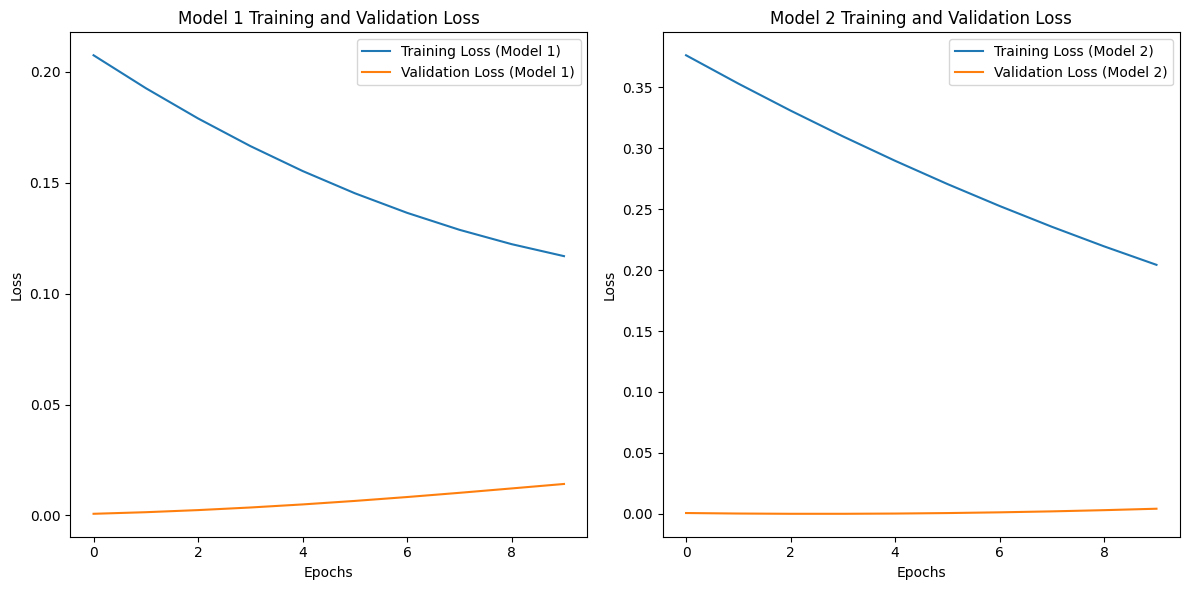

In [ ]:
# Plot training and validation curves for each model separately
plt.figure(figsize=(12, 6))

# Model 1
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss (Model 1)')
plt.plot(history1.history['val_loss'], label='Validation Loss (Model 1)')
plt.title('Model 1 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Model 2
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss (Model 2)')
plt.plot(history2.history['val_loss'], label='Validation Loss (Model 2)')
plt.title('Model 2 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the models on test data
loss1 = model1.evaluate(X_test,Y_test)
loss2 = model2.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 34ms/step - loss: 0.1152


In [ ]:
# Combine the losses and set as the target for the third model
combined_loss = (loss1 + loss2) / 2
y_combined_loss = np.full((len(Y_test), 1), combined_loss)

In [ ]:
# Build and compile the third LSTM model
model3 = Sequential()
model3.add(LSTM(64, input_shape=(n_past, 2)))
model3.add(Dense(1))
model3.compile(optimizer=Adam(), loss=custom_loss)

In [ ]:
# Train the third model using the combined loss as the target
history3 = model3.fit(
    X_test, y_combined_loss,
    epochs=epochs, batch_size=batch_size,
    validation_split=0.1, verbose=0
)

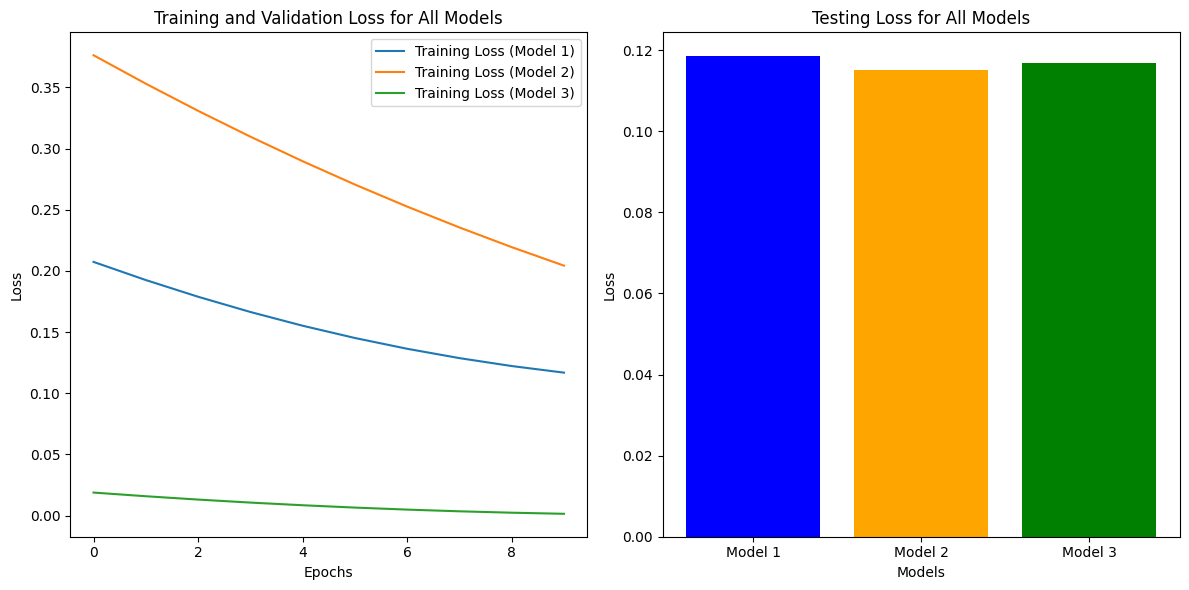

In [ ]:
# Plot training curves for all models on one figure and testing on another figure
plt.figure(figsize=(12, 6))

# Training curves for all models
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss (Model 1)')
#plt.plot(history1.history['val_loss'], label='Validation Loss (Model 1)')
plt.plot(history2.history['loss'], label='Training Loss (Model 2)')
#plt.plot(history2.history['val_loss'], label='Validation Loss (Model 2)')
plt.plot(history3.history['loss'], label='Training Loss (Model 3)')
#plt.plot(history3.history['val_loss'], label='Validation Loss (Model 3)')
plt.title('Training and Validation Loss for All Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Testing performance
plt.subplot(1, 2, 2)
plt.bar(['Model 1', 'Model 2', 'Model 3'], [loss1, loss2, combined_loss], color=['blue', 'orange', 'green'])
plt.title('Testing Loss for All Models')
plt.xlabel('Models')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Extract final training and testing loss for each model
final_loss_table = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Final Training Loss': [history1.history['loss'][-1], history2.history['loss'][-1], history3.history['loss'][-1]],
    'Final Testing Loss': [loss1, loss2, model3.evaluate(X_test, y_combined_loss)]
})

# Display the table
print(final_loss_table)

1/1 [==============================] - 0s 37ms/step - loss: 4.1907e-04
     Model  Final Training Loss  Final Testing Loss
0  Model 1             0.116846            0.118470
1  Model 2             0.204295            0.115224
2  Model 3             0.001474            0.000419


1/1 [==============================] - 0s 33ms/step - loss: 4.1907e-04


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

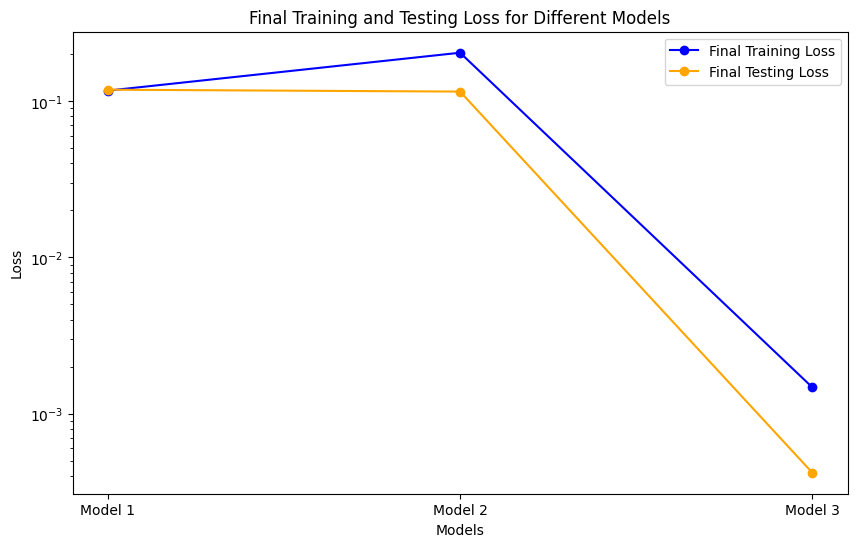

In [ ]:
import matplotlib.pyplot as plt

# Assuming history1, history2, history3 are your training history objects
final_loss_model1 = history1.history['loss'][-1]
final_loss_model2 = history2.history['loss'][-1]
final_loss_model3 = history3.history['loss'][-1]

final_testing_loss_model1 = loss1
final_testing_loss_model2 = loss2
final_testing_loss_model3 = model3.evaluate(X_test, y_combined_loss)

# Plotting the final training loss
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3], [final_loss_model1, final_loss_model2, final_loss_model3], marker='o', label='Final Training Loss', color='blue')

# Plotting the final testing loss
plt.plot([1, 2, 3], [final_testing_loss_model1, final_testing_loss_model2, final_testing_loss_model3], marker='o', label='Final Testing Loss', color='orange')

plt.title('Final Training and Testing Loss for Different Models')
plt.xlabel('Models')
plt.xticks([1, 2, 3], ['Model 1', 'Model 2', 'Model 3'])
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility of small values

plt.tight_layout

## Code II